<a href="https://colab.research.google.com/github/Lucas01iveira/metodos-em-fisica-computacional/blob/main/VPL_RandomWalk.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np 
import matplotlib.pyplot as plt
import random as r
import statistics as s

Npassos = 100
Nbebados = 1000
dx = 1
dt = 1

def random_walk_bebado(N):
  x = [0] # vetor para guardar os passos do bebado (começando em 0)

  for i in range(N-1):
    p = r.random()
    if p >= 1/2:
      x.append(x[i]+dx)
    else:
      x.append(x[i]-dx)
  return x

t = np.linspace(0,Npassos, Npassos) # "steps"
M = [] # matriz para guardar o passo dos Nbebados 
        # linha: andar do i-ésimo bêbado / coluna: j-ésimo step de tempo

for i in range(Nbebados):
  M.append(random_walk_bebado(Npassos))

# Defino vetores para guardar as variáveis de interesse
x_medio = [] # guarda o x_medio de cada passo
x2_medio = [] # guarda o x2_medio de cada passo
variancia = [] # guarda a variancia de cada passo

# Percorro a matriz para calcular as quantidades desejadas
for j in range(len(t)): # para cada coluna

  x_medio_aux = [] # vetor auxiliar
  x2_medio_aux = [] # vetor auxiliar

  for i in range(len(M)): # percorro todas as linhas
    x_medio_aux.append(M[i][j])
    x2_medio_aux.append(M[i][j]**2)
  
  x_medio_step_j = s.mean(x_medio_aux)
  x2_medio_step_j = s.mean(x2_medio_aux)

  x_medio.append(x_medio_step_j)
  x2_medio.append(x2_medio_step_j)
  
  var_step_j = x2_medio_step_j - x_medio_step_j**2
  variancia.append(var_step_j)

# Converto todas as quantidades para um array do numpy:
x_medio = np.array(x_medio)
x2_medio = np.array(x2_medio)
variancia = np.array(variancia) 

#print(x_medio[:5])
#print(x2_medio[:5])
#print(variancia[:5])


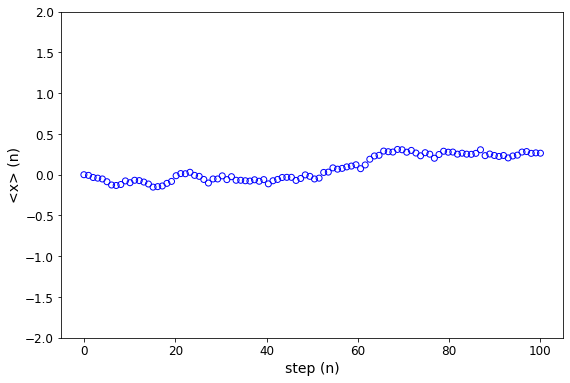

In [ ]:
# Plot de <x> 

ax = plt.figure(figsize=(9,6))
ax = plt.scatter(t, x_medio, facecolor='none', edgecolor='blue')
plt.ylabel('<x> (n)', fontsize=14)
plt.xlabel('step (n)', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.ylim(-2,2)

plt.show()

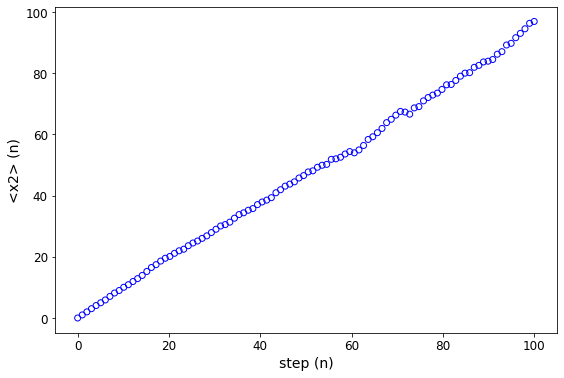

In [ ]:
# Plot de <x**2> (n)

ax = plt.figure(figsize=(9,6))
ax = plt.scatter(t, x2_medio, facecolor='none', edgecolor='blue')
plt.ylabel('<x2> (n)', fontsize=14)
plt.xlabel('step (n)', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """


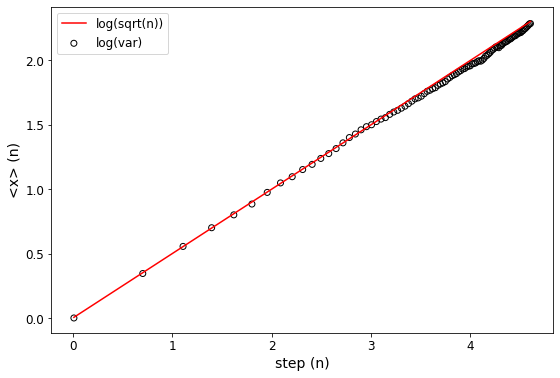

In [ ]:
# Plot log(variancia) x log(step)

ax = plt.figure(figsize=(9,6))
ax = plt.scatter(np.log(t), np.log(np.sqrt(variancia)), facecolor='none', edgecolor='black', label='log(var)')
ax = plt.plot(np.log(t), np.log(np.sqrt(t)), color='red', label='log(sqrt(n))')
plt.xlabel('step (n)', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.legend(fontsize=12)
plt.show()

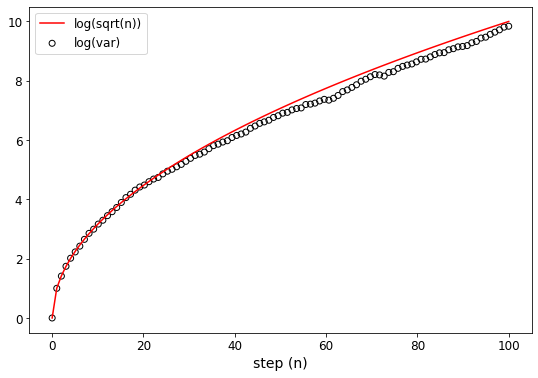

In [ ]:
# Plot variancia x step

ax = plt.figure(figsize=(9,6))
ax = plt.scatter(t, np.sqrt(variancia), facecolor='none', edgecolor='black', label='log(var)')
ax = plt.plot(t, np.sqrt(t), color='red', label='log(sqrt(n))')
plt.xlabel('step (n)', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.legend(fontsize=12)
plt.show()

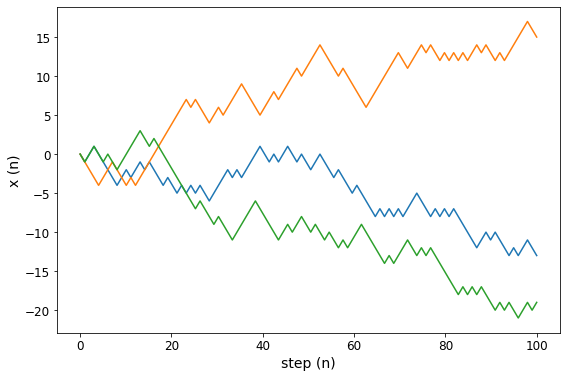

In [2]:
# --------------------------------------------------------------
# (plot do caso de 3 bêbados)
ax = plt.figure(figsize=(9,6))

for i in range(3):
  x = random_walk_bebado(Npassos)
  plt.plot(t, x)

plt.ylabel('x (n)', fontsize=14)
plt.xlabel('step (n)', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

### VPL

In [71]:
import numpy as np
'''
ntot = int(input())
Nr = int(input())
dx = float(input())
seed = int(input())
'''
ntot = 100
Nr = 1000
dx = 1
seed = 1

np.random.seed(seed)

x = np.zeros((Nr,ntot))
steps = np.linspace(0,ntot-1,ntot)

for i in range(Nr):
  for j in range(ntot-1):
    p = np.random.uniform(0.,1.)
    if p >= 1/2:
      x[i][j+1] = x[i][j] + dx
    else:
      x[i][j+1] = x[i][j] - dx
 
xmedio = np.zeros(ntot) # vetor com o x_medio de cada step para o conjunto de bebados
xquad = np.zeros(ntot) # vetor com o x2_medio de cada step para o conjunto de bebados

#print(x)

In [70]:
xmedio = np.sum(x,0)/Nr
xquad = np.sum(x**2,0)/Nr
variancia = xquad - xmedio**2

print('xmedio[40:60]')
for i in range(40,60):
  print('{:10.6e}'.format(xmedio[i]))

print()
print('xquad[40:60]')
for i in range(40,60):
  print('{:10.6e}'.format(xquad[i]))

xmedio[40:60]
4.400000e-02
3.000000e-02
2.200000e-02
5.600000e-02
5.600000e-02
1.020000e-01
1.440000e-01
1.300000e-01
1.260000e-01
1.280000e-01
1.600000e-01
1.440000e-01
6.400000e-02
7.400000e-02
6.400000e-02
4.600000e-02
4.200000e-02
4.200000e-02
6.600000e-02
7.200000e-02

xquad[40:60]
3.660000e+01
3.696000e+01
3.826800e+01
3.970400e+01
4.058400e+01
4.160800e+01
4.277600e+01
4.405600e+01
4.543600e+01
4.659200e+01
4.739200e+01
4.840800e+01
4.929600e+01
5.055200e+01
5.199200e+01
5.343200e+01
5.456400e+01
5.645600e+01
5.786800e+01
5.855200e+01


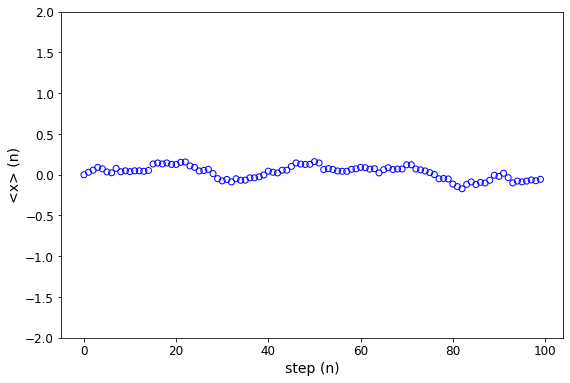

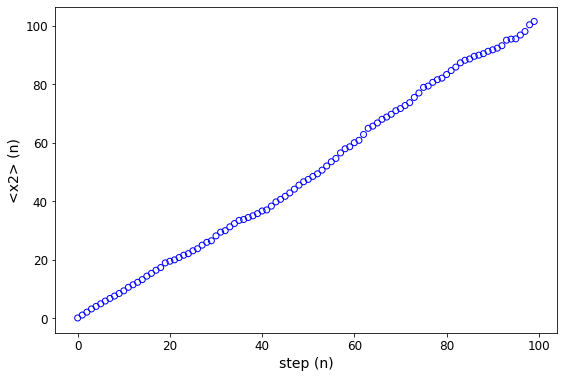

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:27: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log


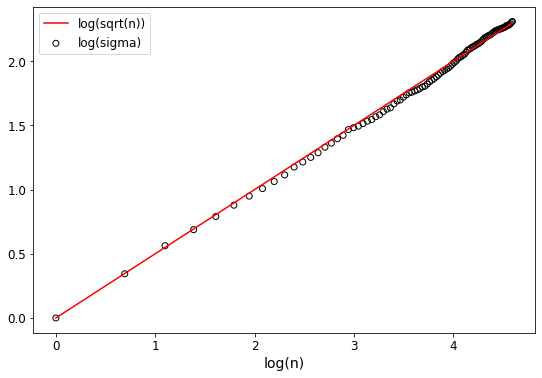

In [63]:
# Gráficos da atividade
ax = plt.figure(figsize=(9,6))
ax = plt.scatter(steps, xmedio, facecolor='none', edgecolor='blue')
plt.ylabel('<x> (n)', fontsize=14)
plt.xlabel('step (n)', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.ylim(-2,2)

plt.savefig('xmedio_bebados.png')
plt.show()
print()

ax = plt.figure(figsize=(9,6))
ax = plt.scatter(steps, xquad, facecolor='none', edgecolor='blue')
plt.ylabel('<x2> (n)', fontsize=14)
plt.xlabel('step (n)', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
#plt.ylim(-2,2)

plt.savefig('xquad_medio_bebados.png')
plt.show()
print()

ax = plt.figure(figsize=(9,6))
ax = plt.scatter(np.log(steps), np.log(np.sqrt(variancia)), facecolor='none', edgecolor='black', label='log(sigma)')
ax = plt.plot(np.log(steps), np.log(np.sqrt(steps)), color='red', label='log(sqrt(n))')
plt.xlabel('log(n)', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.savefig('logxlod_bebados.png')
plt.legend(fontsize=12)
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: RuntimeWarning: divide by zero encountered in log


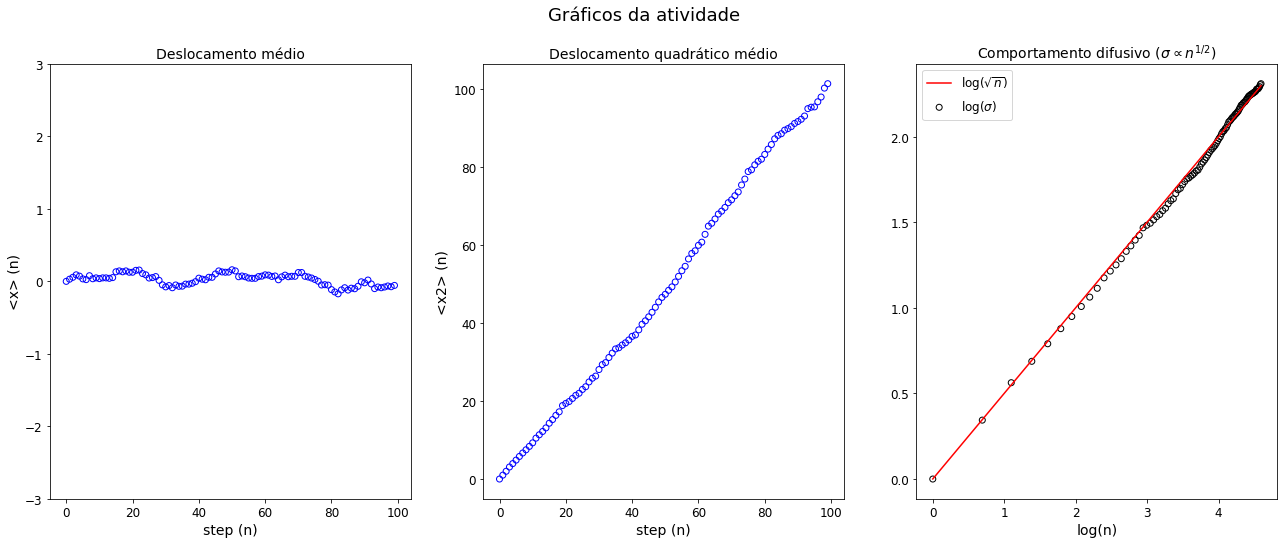

In [68]:
plt.figure(1, figsize=(22,8))
plt.suptitle('Gráficos da atividade',fontsize=18)

plt.subplot(131)
plt.title('Deslocamento médio', fontsize=14)
plt.scatter(steps, xmedio, facecolor='none', edgecolor='blue')
plt.ylabel('<x> (n)', fontsize=14)
plt.xlabel('step (n)', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.ylim(-3,3)

plt.subplot(132)
plt.title('Deslocamento quadrático médio', fontsize=14)
plt.scatter(steps, xquad, facecolor='none', edgecolor='blue')
plt.ylabel('<x2> (n)', fontsize=14)
plt.xlabel('step (n)', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.subplot(133)
plt.title('Comportamento difusivo ($\sigma \propto n^{1/2}$)', fontsize=14)
plt.scatter(np.log(steps), np.log(np.sqrt(variancia)), facecolor='none', edgecolor='black', label='$\log( \sigma)$')
plt.plot(np.log(steps), np.log(np.sqrt(steps)), color='red', label='$\log( \sqrt{n})$')
plt.xlabel('log(n)', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=12)

plt.savefig('graficos_bebado.pdf')
plt.show()